For the algorithms section of the project, I did a manual implementation of the DFT and FFT algorithms. 

I compared my implementations with the built-in implemntations from Scipy and confirmed that they produced the same results.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

#1st implementation of DFT
#does not use meshgrid
def DFT_simple(x):
    N = np.size(x)
    #creates the final vector that will store the fourier transform of x
    x_fourier_transform = np.zeros((N,),dtype= np.complex128)
    #loop through every row of the DFT matrix
    for m in range(0,N):
        #multiply each of the n values in the mth row of the DFT matrix by x[n] to get the fourier transformed value x_fourier_transform[m] and add it to the final vector
        for n in range(0,N):
            x_fourier_transform[m] += x[n]*np.exp(-np.pi*2j*m*n/N)
    return x_fourier_transform

#2nd implementation of DFT
#uses meshgrid
def DFT_meshgrid(x):
    N = np.size(x)    
    #creates the DFT matrix
    J,K = np.meshgrid(np.arange(N), np.arange(N))
    w = np.exp(-np.pi*2j/N)
    DFT_matrix = np.power(w, J*K)
    #matrix multiply it by x
    return np.matmul(DFT_matrix, x)

#recursive implementation of FFT
def FFT(x):
    """
    note: input should have a length
    of a power of 2
    """
    
    N = len(x)
    if N == 1:
        return x
    #edge case handling for if not a power of 2
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        X = np.concatenate([X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X
    

    
    
#create a vector of 1024 random samples from a uniform distribution over [0, 1)
x = np.random.rand(1024,)

# compute DFT using our functions
X_dft_simple = DFT_simple(x)
X_dft_meshgrid = DFT_meshgrid(x)

# compute DFT using built-in scipy functions
X_dft_scipy = np.matmul(scipy.linalg.dft(np.size(x)), x)

# compute FFT using our function
X_fft_manual = FFT(x)

# compute FFT using built-in scipy functions
X_fft_scipy = scipy.fft.fft(x)

# now compare our estimates with the scipy estimates
print('Is our first manual estimate of DFT close to the scipy estimate of DFT?',np.allclose(X_dft_simple - X_dft_scipy,1e-12))
print('Is our second manual estimate of DFT close to the scipy estimate of DFT?',np.allclose(X_dft_meshgrid - X_dft_scipy,1e-12))
print('Is our  manual estimate of FFT close to the scipy estimate of DFT?',np.allclose(X_fft_manual - X_dft_scipy,1e-12))

print('Is our first manual estimate of DFT close to the scipy estimate of FFT?',np.allclose(X_dft_simple - X_fft_scipy,1e-12))
print('Is our second manual estimate of DFT close to the scipy estimate of FFT?',np.allclose(X_dft_meshgrid - X_fft_scipy,1e-12))
print('Is our manual estimate of FFT close to the scipy estimate of FFT?',np.allclose(X_fft_manual - X_fft_scipy,1e-12))

Is our first manual estimate of DFT close to the scipy estimate of DFT? True
Is our second manual estimate of DFT close to the scipy estimate of DFT? True
Is our  manual estimate of FFT close to the scipy estimate of DFT? True
Is our first manual estimate of DFT close to the scipy estimate of FFT? True
Is our second manual estimate of DFT close to the scipy estimate of FFT? True
Is our manual estimate of FFT close to the scipy estimate of FFT? True


Next, I graphed the runtime of my DFT and FFT algorithms for vectors of increasingly length to verify that DFT has O(N^2) runtime complexity and FFT has O(n(log(n))) runtime complexity. 

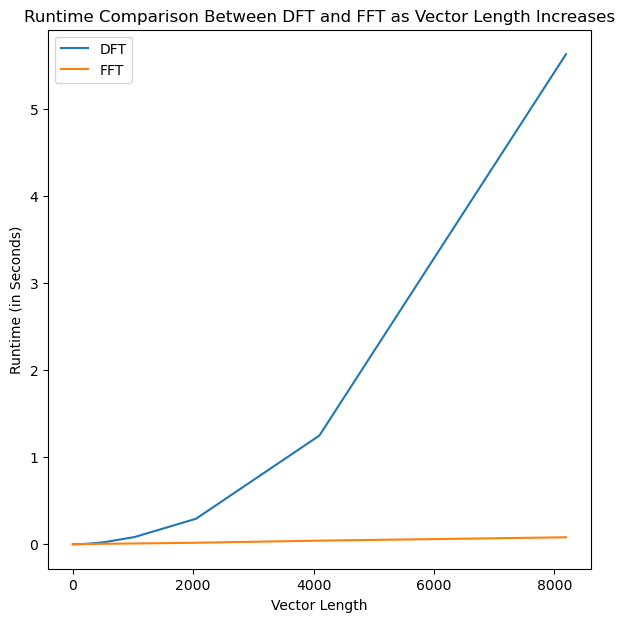

In [5]:
import time

# Simulation Parameters

#We do multiple iterations to help reduce random variance in runtime and get a more realistic estimate
num_iterations   = 6

#We'll test our algorithms on increasingly long vectors to track how the runtime increases
#Note: FFT requires vector length to be a power of 2
sample_size = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


# We'll store all the runtimes for DFT and FFT in these matrices to be graphed later
DFT_time = np.zeros((num_iterations, len(sample_size)))
FFT_time = np.zeros((num_iterations, len(sample_size)))

#generates 
for j in range(len(sample_size)):
    #as j increases, numSamples iterates through the powers of 2
    num_samples = sample_size[j]

    #create a vector of random samples from a uniform distribution over [0, 1) of length num_samples
    x = np.random.rand(num_samples,)
    
    #run DFT and FFT on the vector several times and record how long each algorithm took each time
    for i in range(num_iterations):
        time_before_DFT = time.time()
        DFT_meshgrid(x)
        DFT_time[i, j] = time.time() - time_before_DFT
        
        time_before_FFT = time.time()
        FFT(x)
        FFT_time[i, j] = time.time() - time_before_FFT


#we take the median of our runtime samples to get our final runtime estimates for DFT and FFT
DFT_time_median = np.median(DFT_time, 0)
FFT_time_median = np.median(FFT_time, 0)

#plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(sample_size, DFT_time_median, label = "DFT")
plt.plot(sample_size, FFT_time_median, label = "FFT")
leg = plt.legend(loc='upper left')
plt.xlabel('Vector Length')
plt.ylabel('Runtime (in Seconds)')
plt.title('Runtime Comparison Between DFT and FFT as Vector Length Increases')
plt.show()

As we can see, DFT gets exponentially slower than FFT as the length of the input vector increases. 